<a href="https://colab.research.google.com/github/SreeramAdari/Data_Science_Assignmnents/blob/main/EDA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

df = pd.read_csv('Cardiotocographic.csv')

# Fill missing values in numeric columns with the mean
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
      df[column]=df[column].fillna(df[column].mean())

# Remove outliers using Z-score across all numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
z_scores = np.abs(stats.zscore(df[numeric_cols]))
df = df[(z_scores < 3).all(axis=1)]

print(df.head())

           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  


In [ ]:
summary_stats = df.describe()
print(summary_stats)

for column in df.columns:
  if pd.api.types.is_numeric_dtype(df[column]):
    print(f"\nVariable: {column}")
    print(f"  Mean: {df[column].mean()}")
    print(f"  Median: {df[column].median()}")
    print(f"  Standard Deviation: {df[column].std()}")
    print(f"  Interquartile Range: {df[column].quantile(0.75) - df[column].quantile(0.25)}")

                LB           AC           FM           UC           DL  \
count  1869.000000  1869.000000  1869.000000  1869.000000  1869.000000   
mean    133.306955     0.003194     0.004240     0.004391     0.001732   
std       9.899631     0.003767     0.013554     0.002904     0.002705   
min     106.000000    -0.000185    -0.005106    -0.000132    -0.000124   
25%     126.000000     0.000000     0.000000     0.002002     0.000000   
50%     133.000000     0.001733     0.000000     0.004556     0.000000   
75%     141.000000     0.005650     0.002358     0.006579     0.003036   
max     160.000000     0.016000     0.189320     0.013861     0.011837   

                 DS           DP         ASTV         MSTV         ALTV  \
count  1.869000e+03  1869.000000  1869.000000  1869.000000  1869.000000   
mean   3.736781e-08     0.000102    46.870868     1.283173     9.193894   
std    6.367633e-07     0.000404    16.834525     0.778099    16.574763   
min   -6.650000e-06    -0.000045 

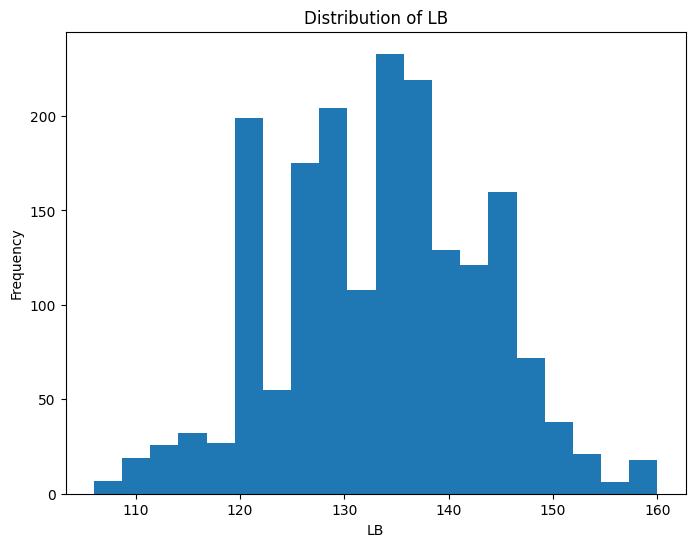

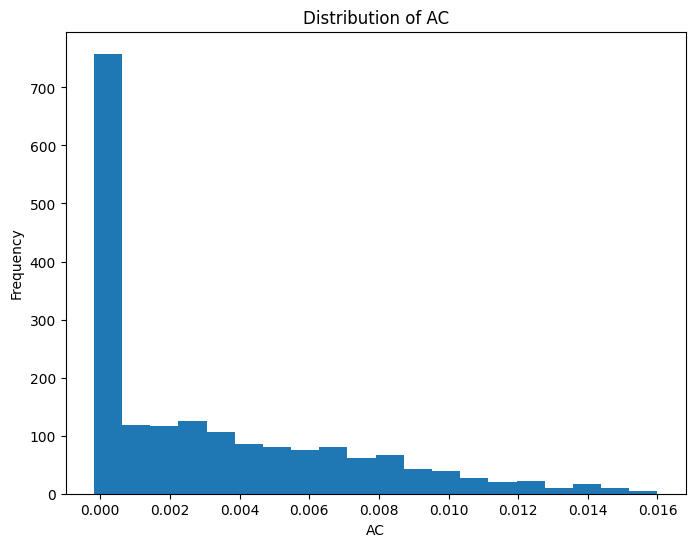

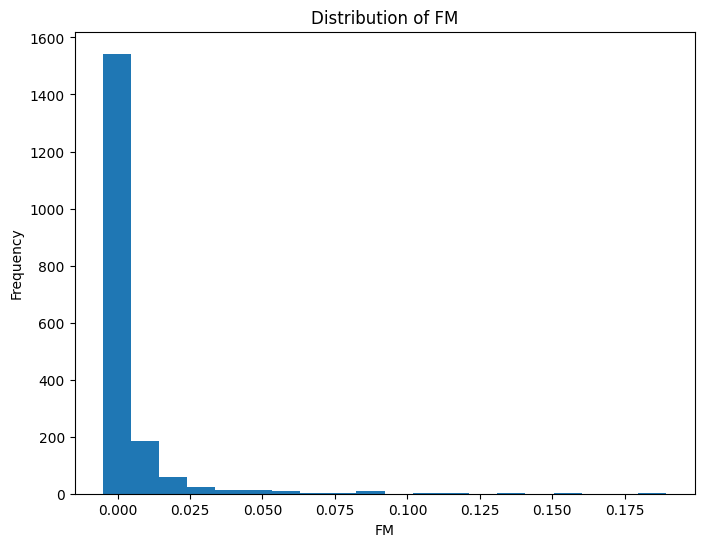

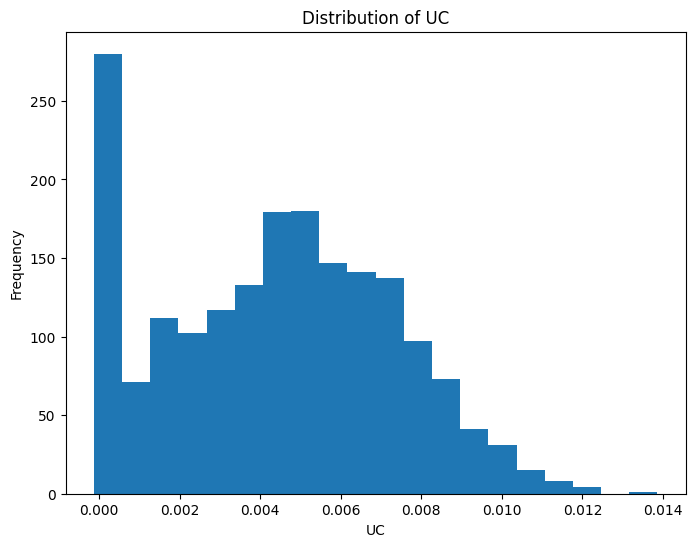

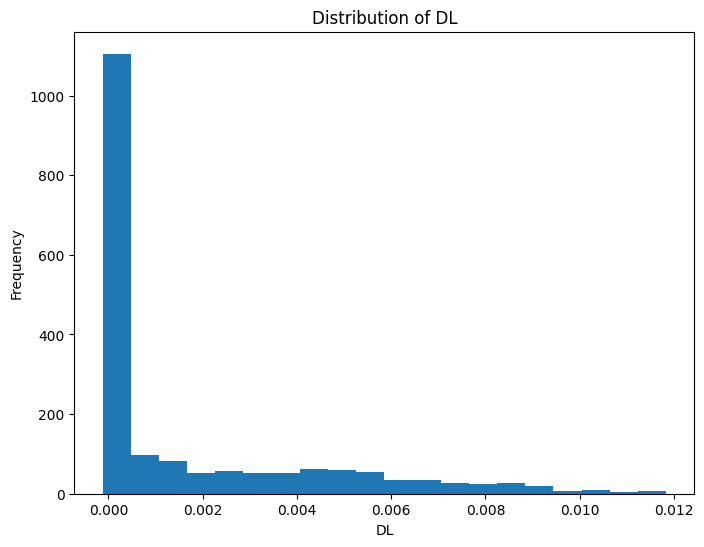

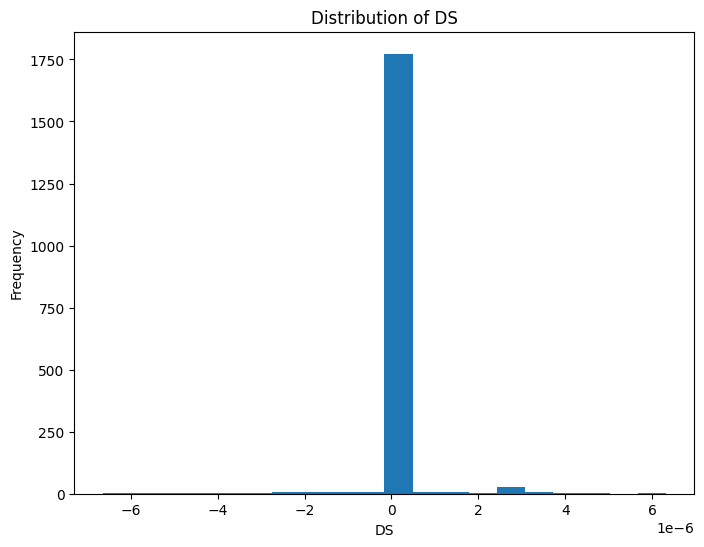

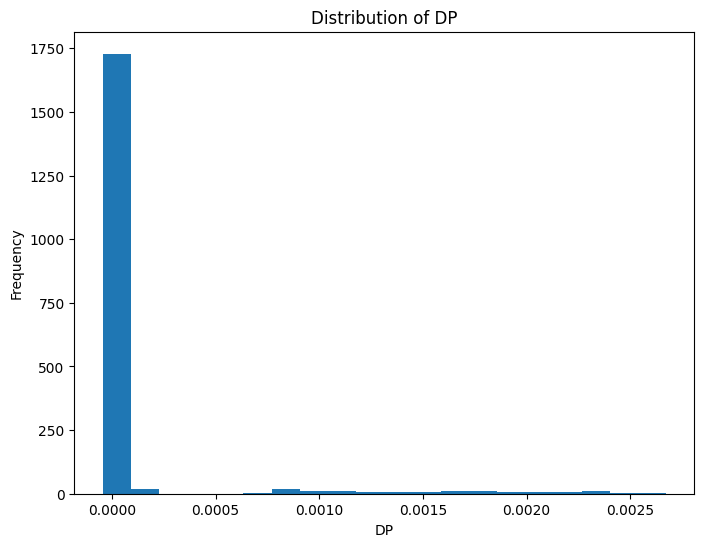

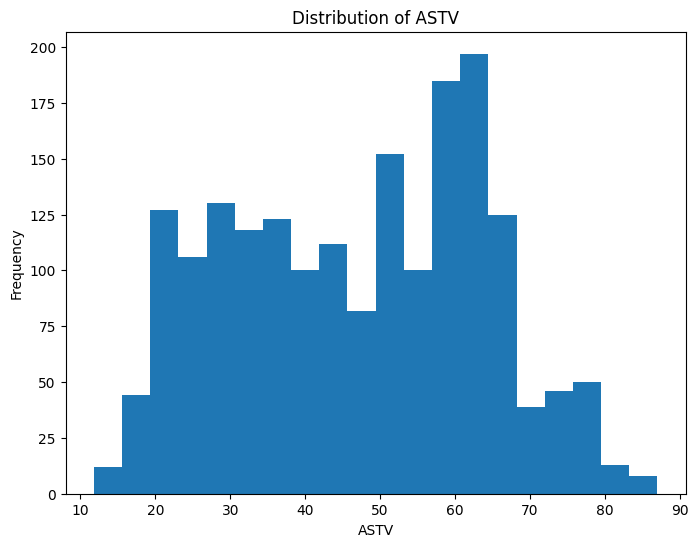

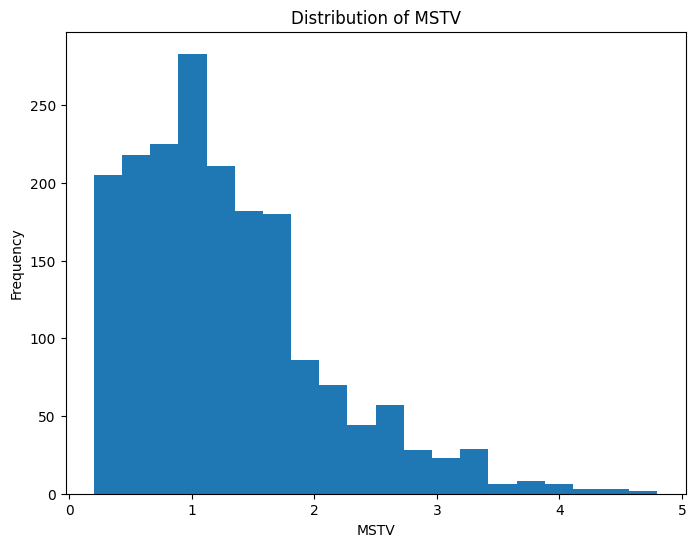

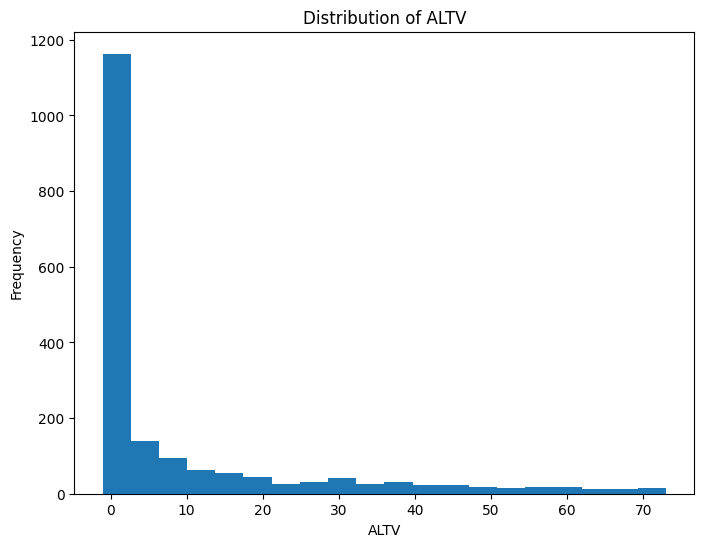

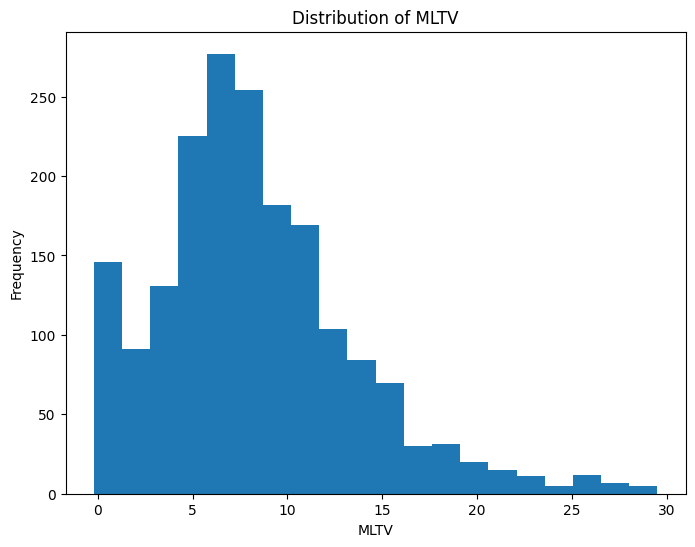

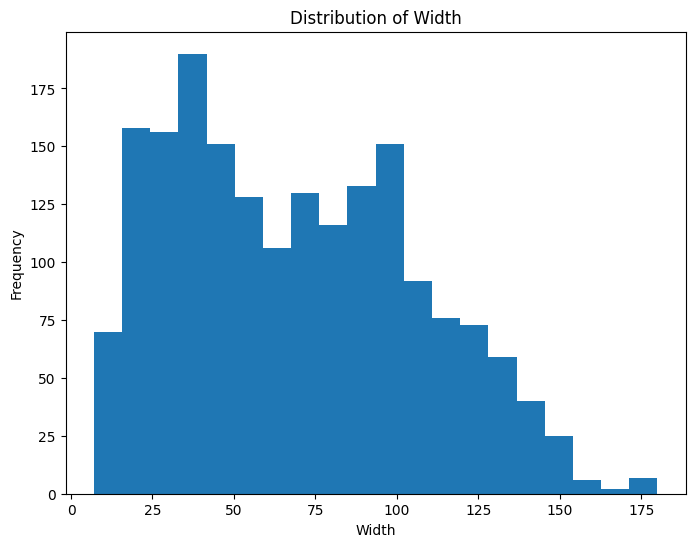

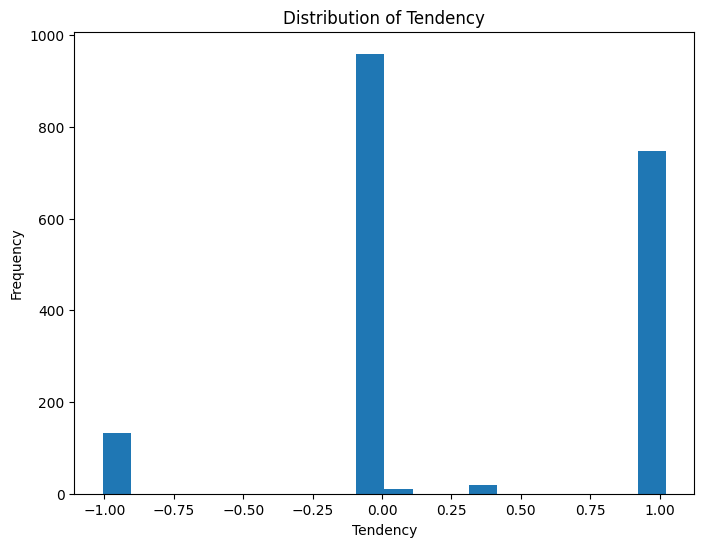

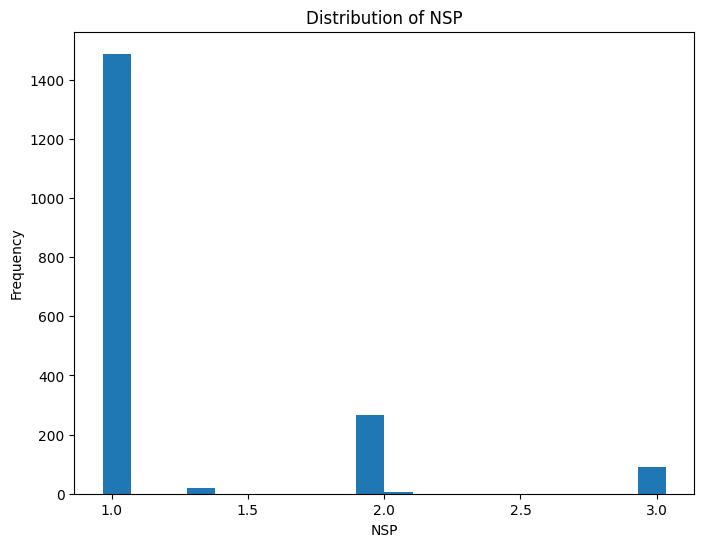

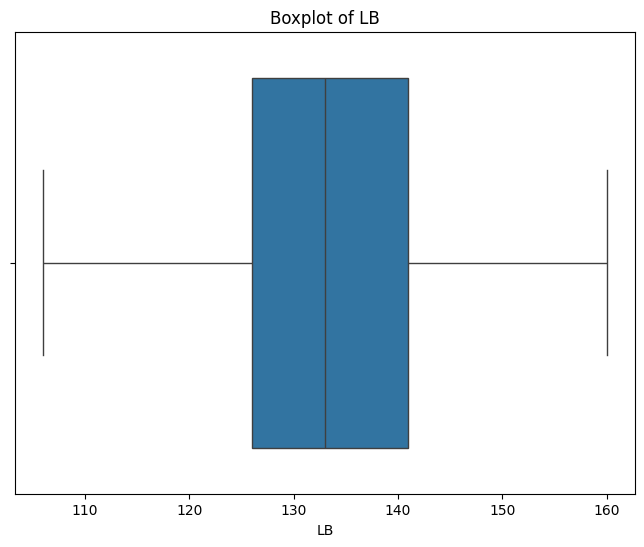

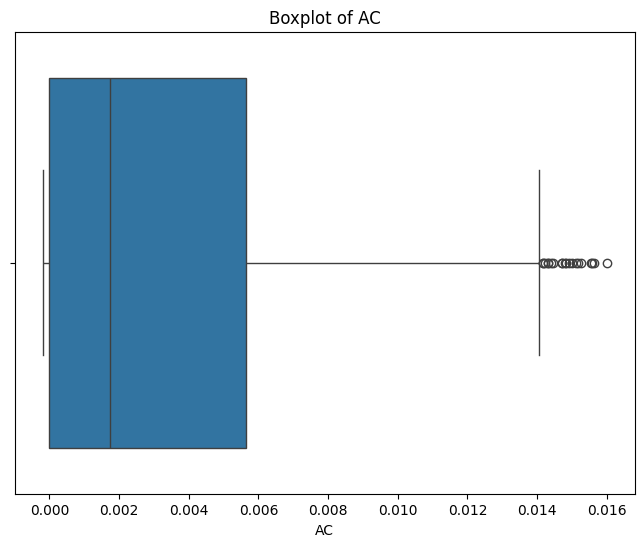

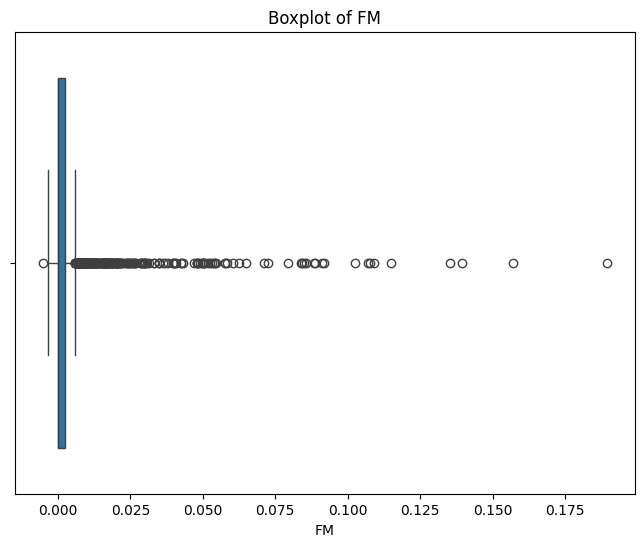

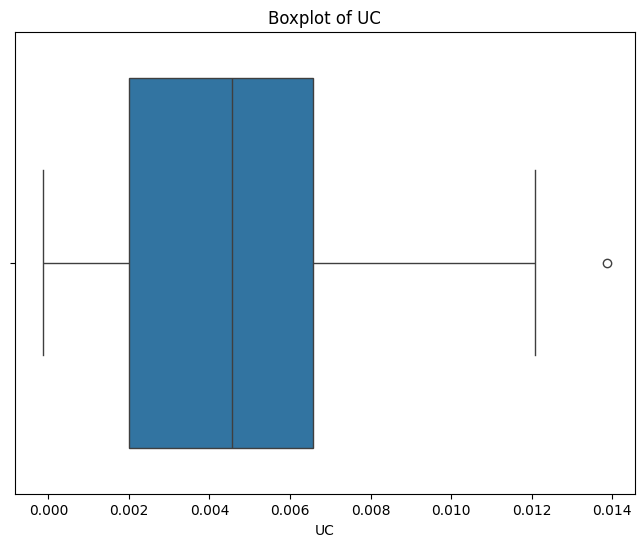

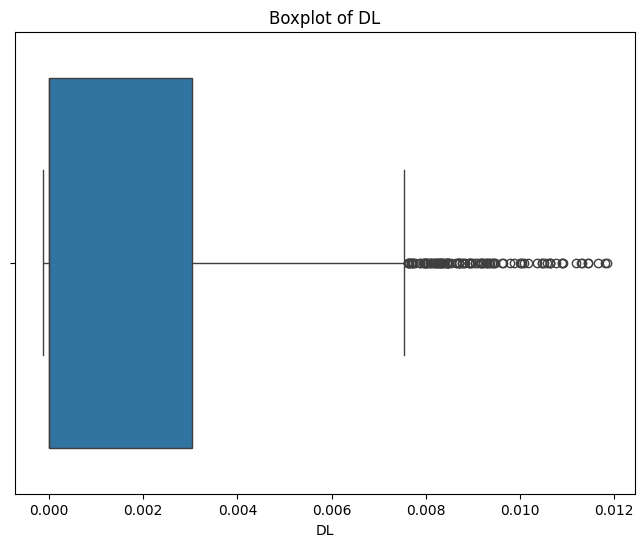

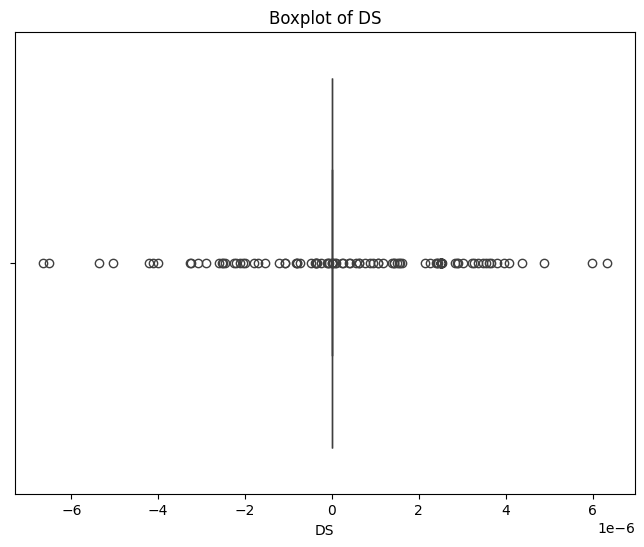

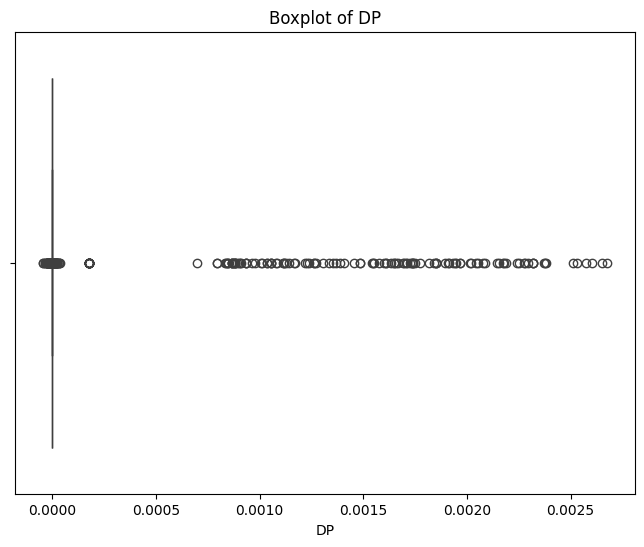

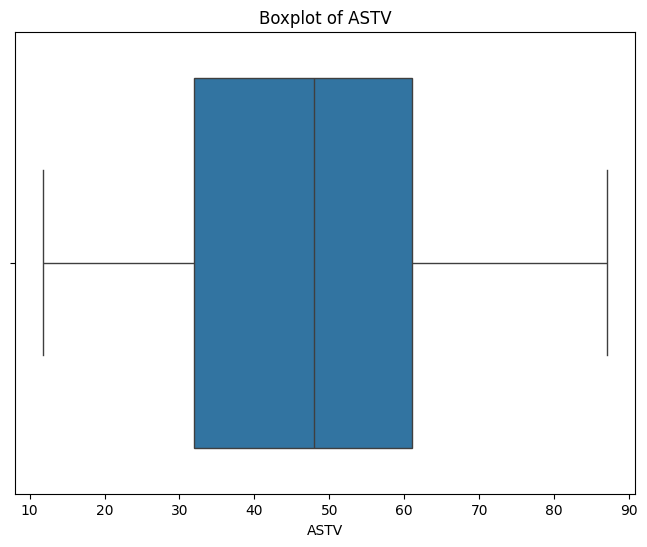

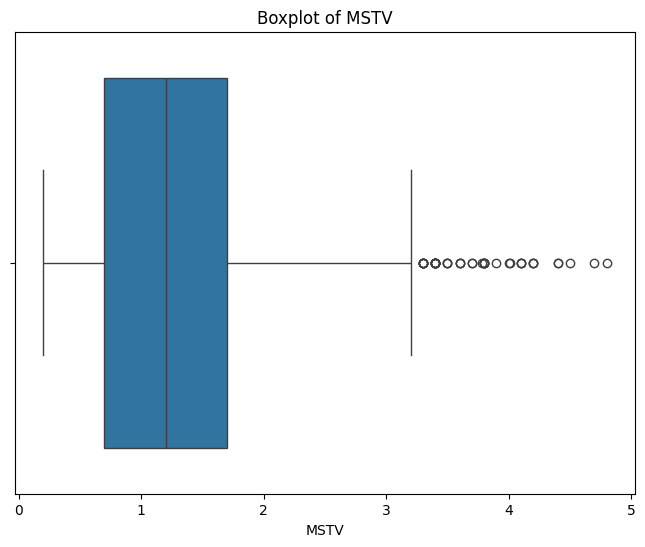

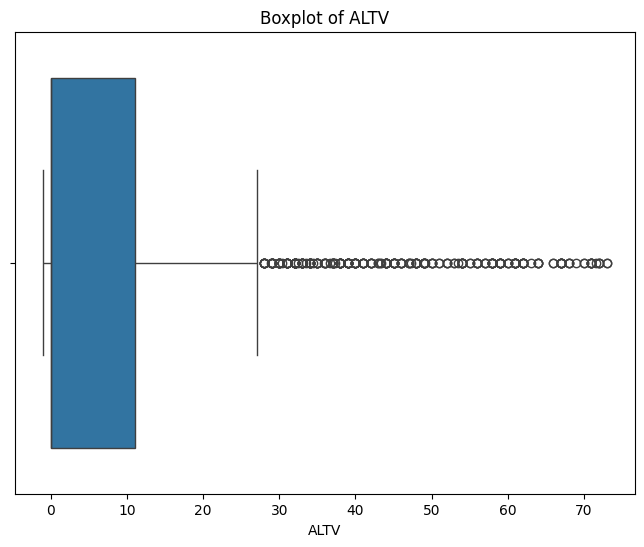

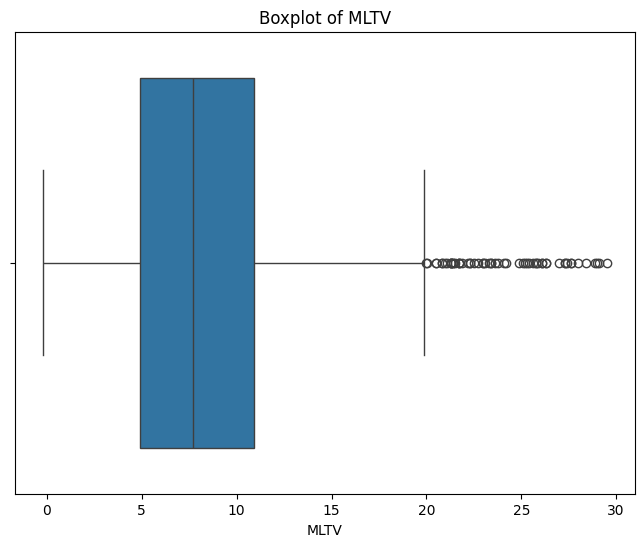

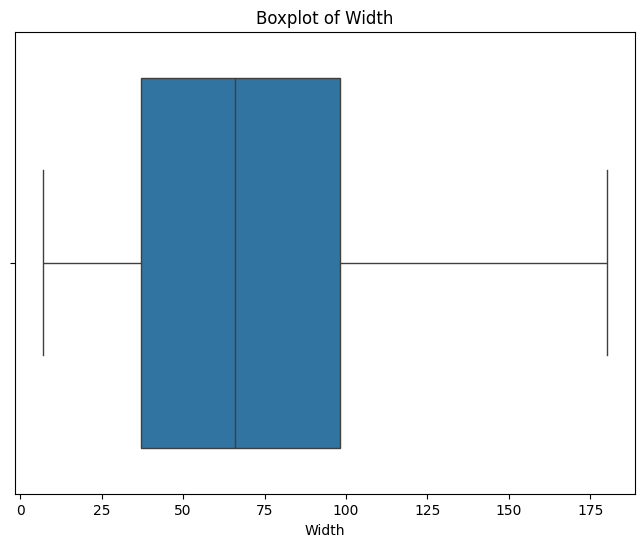

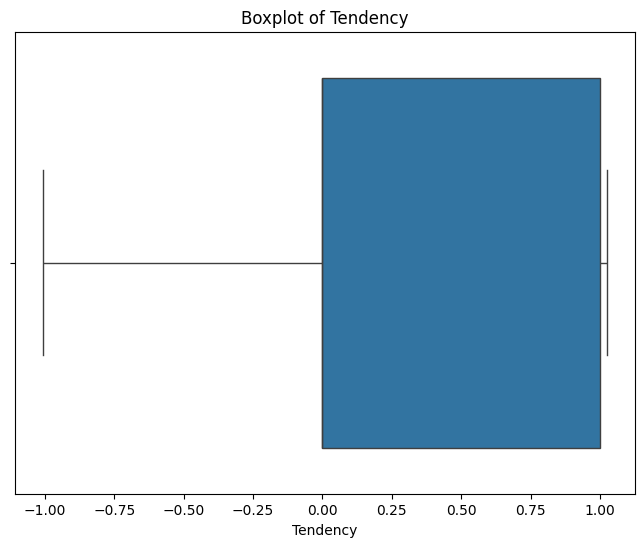

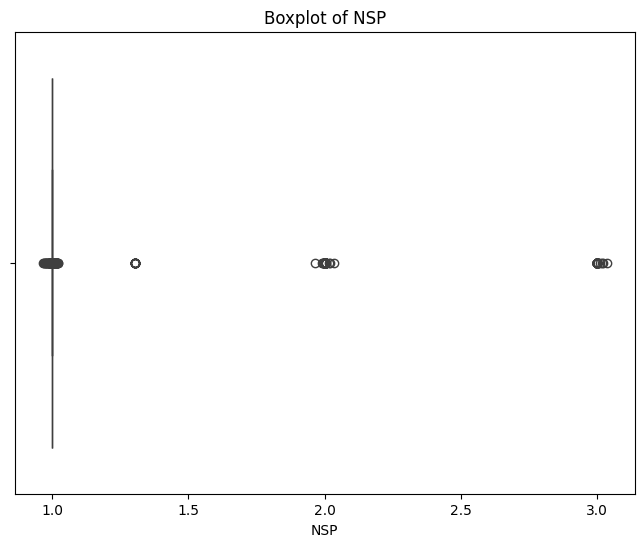

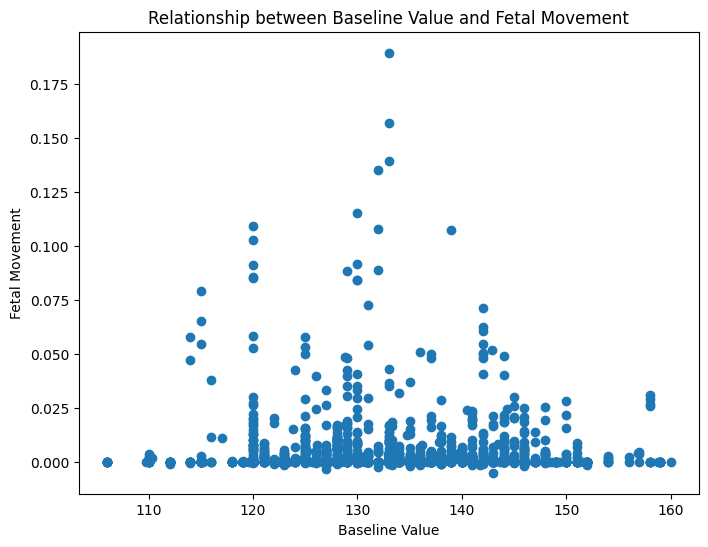

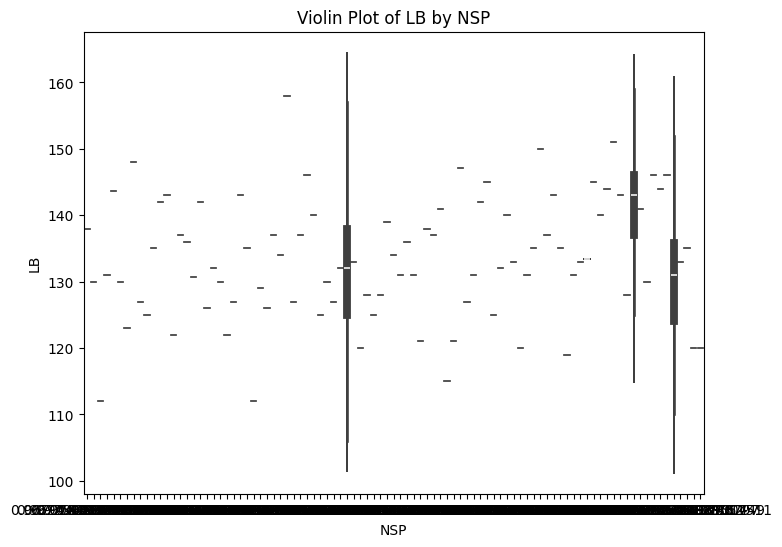

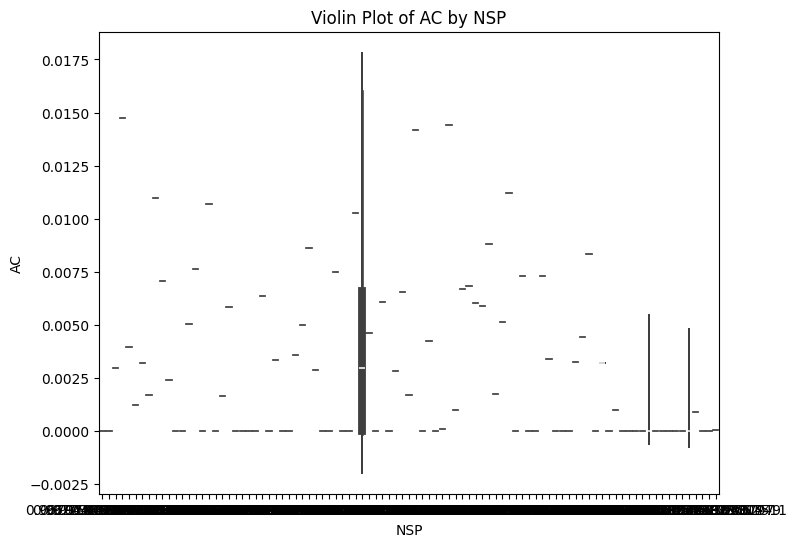

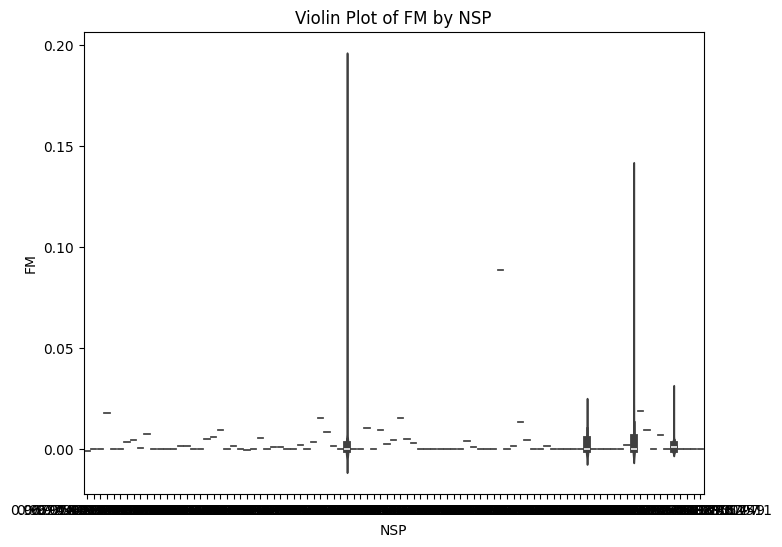

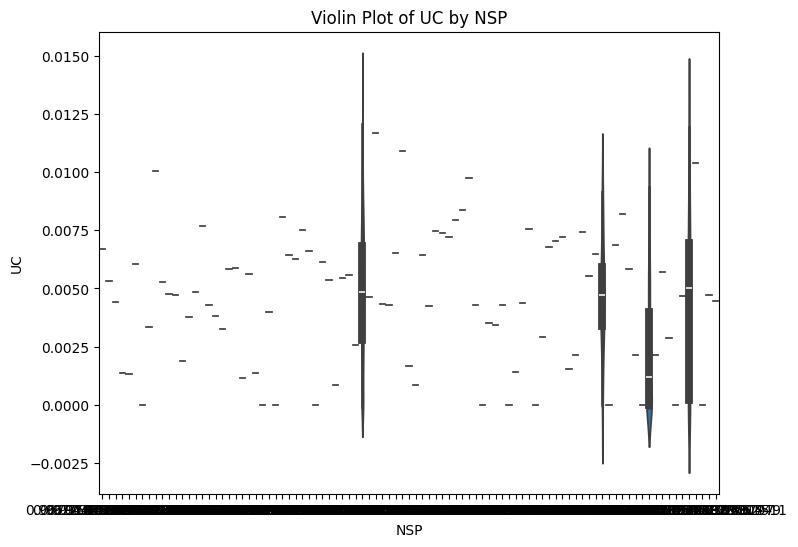

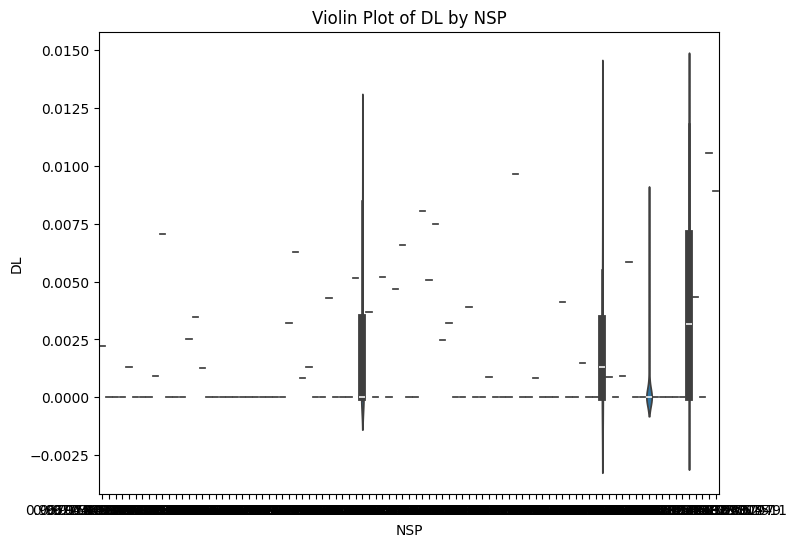

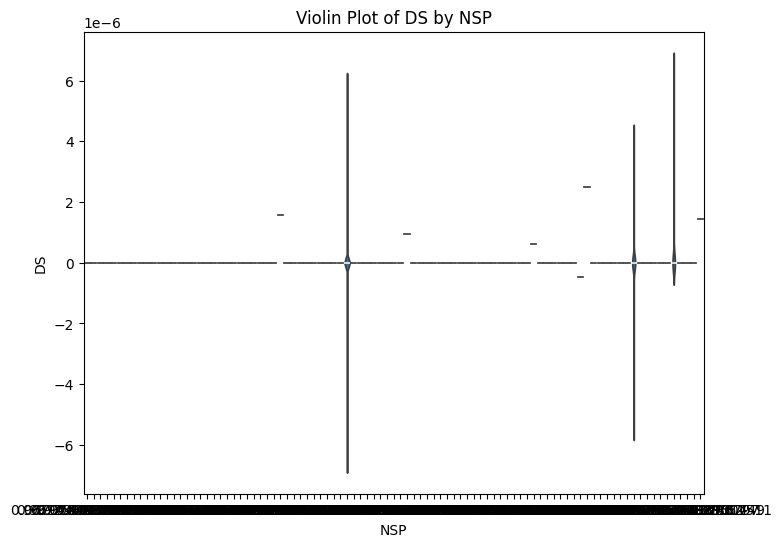

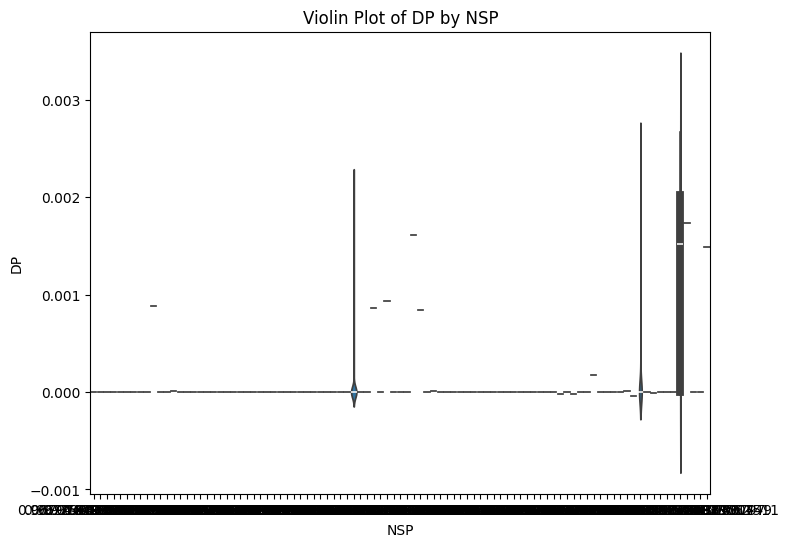

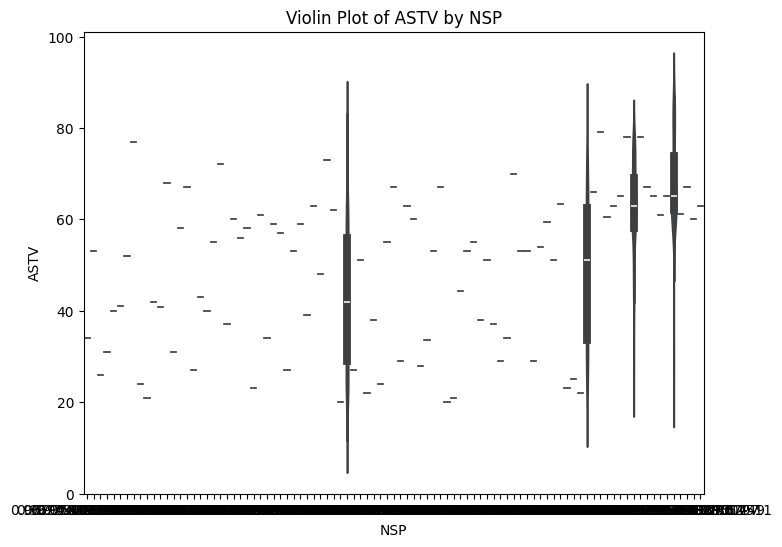

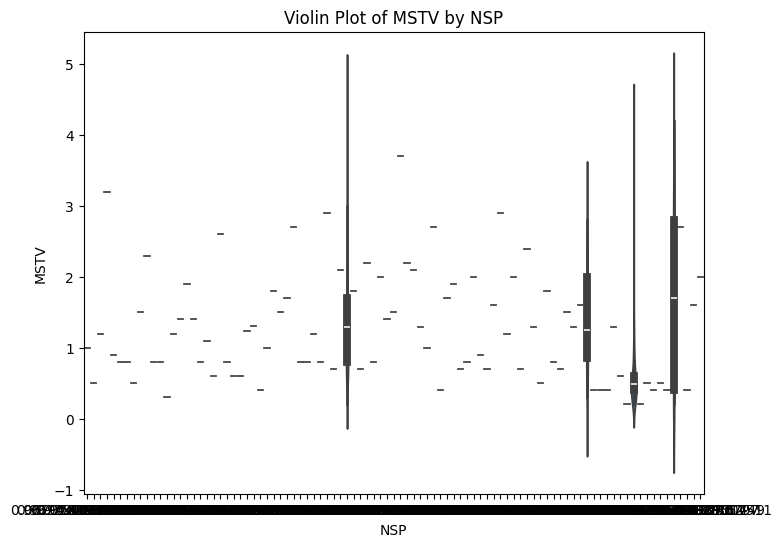

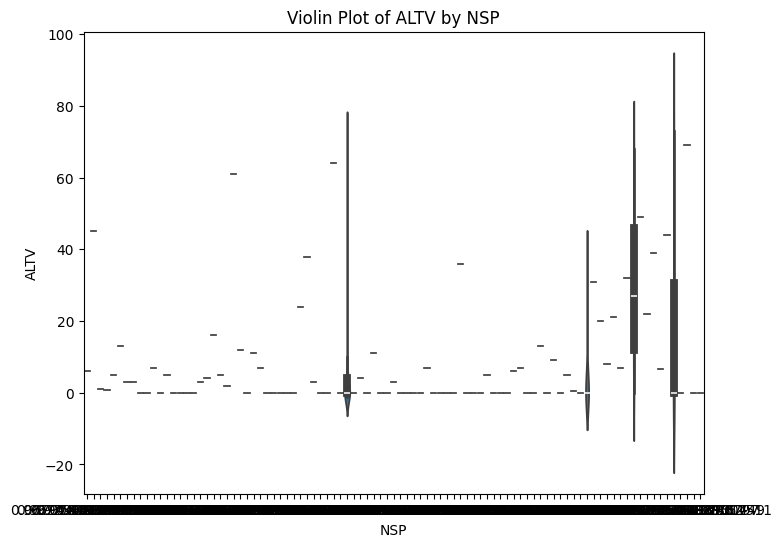

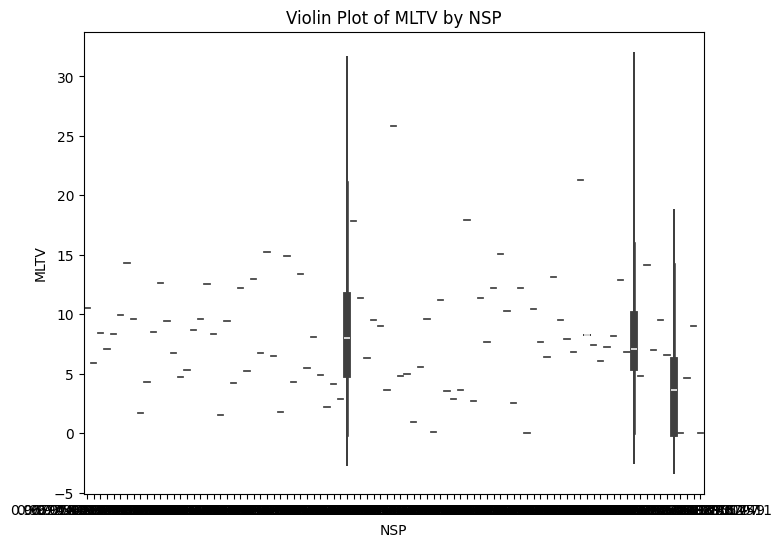

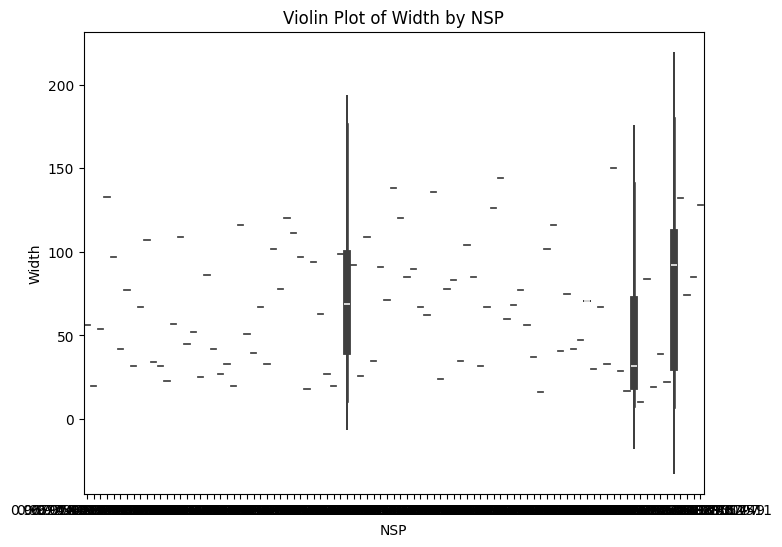

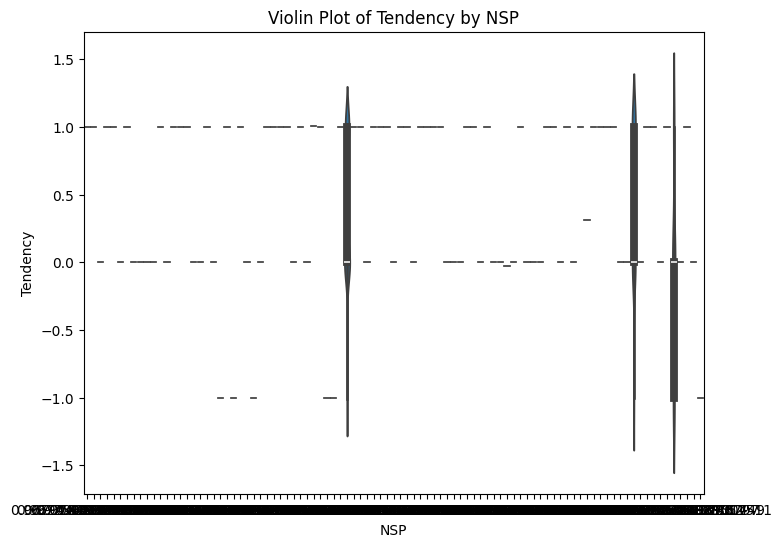

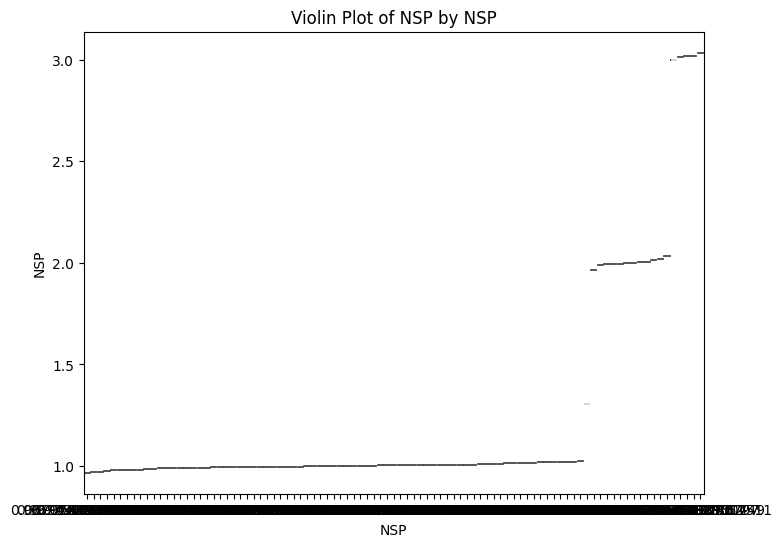

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histograms for Numerical Variables
for column in df.select_dtypes(include=[np.number]).columns:
  plt.figure(figsize=(8, 6))
  plt.hist(df[column], bins=20)
  plt.title(f'Distribution of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show()

# 2. Boxplots for Numerical Variables
for column in df.select_dtypes(include=[np.number]).columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[column])
  plt.title(f'Boxplot of {column}')
  plt.show()


# 3. Bar Charts for Categorical Variables
for column in df.select_dtypes(include=['object']).columns:
  plt.figure(figsize=(8, 6))
  df[column].value_counts().plot(kind='bar')
  plt.title(f'Frequency of {column}')
  plt.xlabel(column)
  plt.ylabel('Count')
  plt.show()

# 4. Scatter Plots
plt.figure(figsize=(8, 6))
plt.scatter(df['LB'], df['FM'])
plt.title('Relationship between Baseline Value and Fetal Movement')
plt.xlabel('Baseline Value')
plt.ylabel('Fetal Movement')
plt.show()

# 5. Advanced Visualization Techniques (Pair Plot)
sns.pairplot(df, hue='NSP', diag_kind='kde') # Replace 'NSP' with a relevant categorical variable for hue
plt.show()

# 6. Advanced Visualization Techniques
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='NSP', y=column, data=df)
    plt.title(f'Violin Plot of {column} by NSP')
    plt.show()

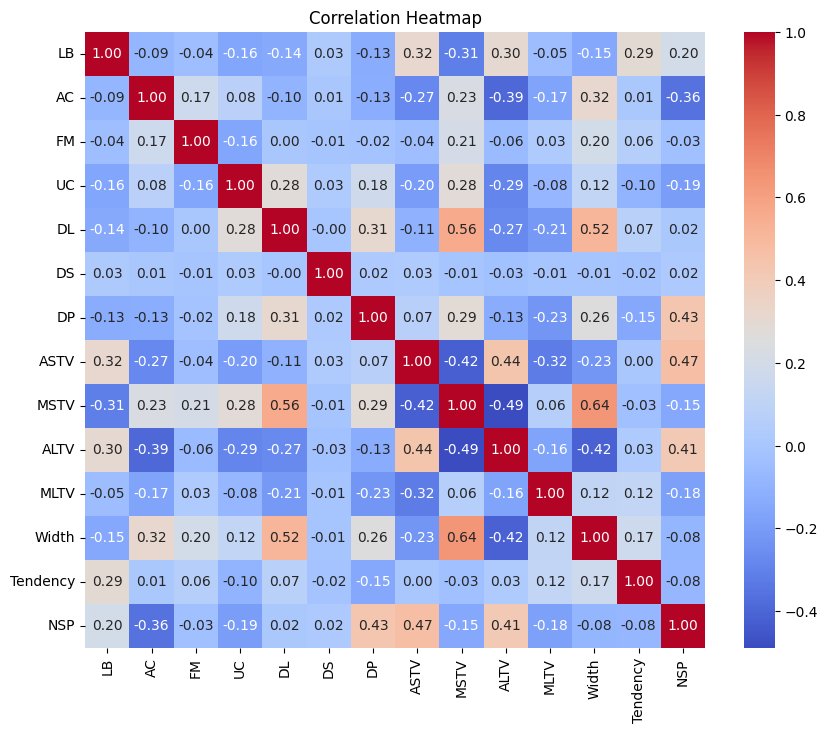


Highly Correlated Features:
            LB   AC   FM   UC   DL   DS   DP  ASTV  MSTV  ALTV  MLTV  Width  \
LB        1.0  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN    NaN   
AC        NaN  1.0  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN    NaN   
FM        NaN  NaN  1.0  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN    NaN   
UC        NaN  NaN  NaN  1.0  NaN  NaN  NaN   NaN   NaN   NaN   NaN    NaN   
DL        NaN  NaN  NaN  NaN  1.0  NaN  NaN   NaN   NaN   NaN   NaN    NaN   
DS        NaN  NaN  NaN  NaN  NaN  1.0  NaN   NaN   NaN   NaN   NaN    NaN   
DP        NaN  NaN  NaN  NaN  NaN  NaN  1.0   NaN   NaN   NaN   NaN    NaN   
ASTV      NaN  NaN  NaN  NaN  NaN  NaN  NaN   1.0   NaN   NaN   NaN    NaN   
MSTV      NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   1.0   NaN   NaN    NaN   
ALTV      NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   1.0   NaN    NaN   
MLTV      NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   1.0    NaN   
Width     NaN  NaN  NaN  NaN  NaN 

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Find highly correlated features (correlation > 0.7)
high_corr = corr_matrix[abs(corr_matrix) > 0.7]
print("\nHighly Correlated Features:\n", high_corr)


We performed a detailed analysis of the cardiographic dataset to understand fetal health patterns. After cleaning the data and handling missing values, we examined statistical summaries and visualized key features. Distributions revealed potential outliers and skewness in some variables. A correlation heatmap showed strong relationships, especially between LB and MSTV. Violin and box plots highlighted how physiological metrics vary with NSP (fetal health status). These insights can guide clinical decisions, help predict abnormal fetal conditions, and support future modeling tasks for early interventions.

